In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh
from tqdm import tqdm
from scipy.stats import norm, gamma
from itertools import combinations

# Problem 1

$$P(x, y) = \frac{1}{N}e^{-x^2-y^2-xy} = \frac{1}{N}e^{-\frac{1}{2}(2x^2+2y^2+2xy)}$$
$$2x^2+2y^2+2xy = (x, y)\begin{pmatrix}
2 & 1 \\
1 & 2 
\end{pmatrix}\begin{pmatrix}
x \\
y
\end{pmatrix}$$
Thus, matrix $A = \begin{pmatrix}
2 & 1 \\
1 & 2 
\end{pmatrix}$.
$$P(x, y) = \frac{1}{N}e^{-x^2-y^2-xy} = \frac{1}{N}e^{-\frac{1}{2}((x, y)A\begin{pmatrix} x \\ y \end{pmatrix})}$$

### 1

By formula from lecture:
$$N = \frac{(2\pi)^{M/2}}{\sqrt{\det{A}}}$$
Hence, with $M=2$ and our $\det{A} = 2*2 - 1*1 = 3$: $$N = \frac{(2\pi)^{2/2}}{\sqrt{3}} = \frac{2\pi}{\sqrt{3}}$$

### 2

$$P(x) = \int\limits_{-\infty}^{+\infty} P(x, y)dy= \int\limits_{-\infty}^{+\infty}\frac{\sqrt{3}}{2\pi}e^{-x^2-y^2-xy}dy = \frac{\sqrt{3}}{2\pi}\int\limits_{-\infty}^{+\infty}e^{-x^2-y^2-xy}dy = \frac{\sqrt{3}}{2\pi} e^{-3x^2/4} \int\limits_{-\infty}^{+\infty}e^{-y^2-xy-x^2/4}dy = \\ = \frac{\sqrt{3}}{2\pi} e^{-3x^2/4} \int\limits_{-\infty}^{+\infty}e^{-(y + x/2)^2}dy = \{z = y + x/2\} = \frac{\sqrt{3}}{2\pi} e^{-3x^2/4} \int\limits_{-\infty}^{+\infty}e^{-z^2}dz = \frac{\sqrt{3}}{2\sqrt{\pi}} e^{-3x^2/4}$$

### 3

$$P(x|y) = \frac{P(x, y)}{P(y)}$$
$P(y) = \frac{\sqrt{3}}{2\sqrt{\pi}} e^{-3y^2/4}$, from point 2, since $x$ and $y$ have same variance.
$$\frac{P(x, y)}{P(y)} = \frac{\frac{\sqrt{3}}{2\pi}e^{-x^2-y^2-xy}}{\frac{\sqrt{3}}{2\sqrt{\pi}} e^{-3y^2/4}} = \frac{1}{\sqrt{\pi}}e^{-x^2-y^2-xy+3y^2/4} = \frac{1}{\sqrt{\pi}} e^{-x^2-xy-y^2/4}$$

### 4

In [2]:
A = np.array([[2, 1], [1, 2]])
A_inv = np.linalg.inv(A)

In [3]:
A_inv

array([[ 0.66666667, -0.33333333],
       [-0.33333333,  0.66666667]])

Inverse of matrix A is $$A^{-1} = \begin{pmatrix}2/3 & -1/3 \\ -1/3 & 2/3 \end{pmatrix}$$

$$E[x^2y^2] = E[x*x*y*y] = E[x^2]E[y^2] + E[xy]E[xy] + E[xy]E[xy] = E[x^2]E[y^2] + 2E^2[xy]$$
$E[x^2] = A_{11}^{-1} = \frac{2}{3}$, $E[y^2] = A_{22}^{-1} = \frac{2}{3}$, $E[xy] = A_{12}^{-1} = -\frac{1}{3}$
$$E[x^2y^2] = E[x^2]E[y^2] + 2E^2[xy] = \frac{2}{3} * \frac{2}{3} + 2 * \frac{1}{9} = \frac{2}{3}$$

$$E[xy^3] = E[xy]E[y^2] + E[xy]E[y^2] + E[xy]E[y^2] = 3E[xy]E[y^2] = 3 * \frac{-1}{3} * \frac{2}{3} = -\frac{2}{3}$$

# Problem 2

In [3]:
N = 5000
random_elements = np.random.randn(N, N)
goe_matrix = (random_elements + random_elements.T) / 2**0.5

In [4]:
eigenvalues = eigh(goe_matrix, eigvals_only=True)

In [5]:
def wigner_semi_circle_function(x):
    return 1 /np.pi * np.sqrt(2 - x**2)

Eigenvalues divided by $\sqrt{N\sigma^2}$ converge in ditribution to Wigner semi-circle

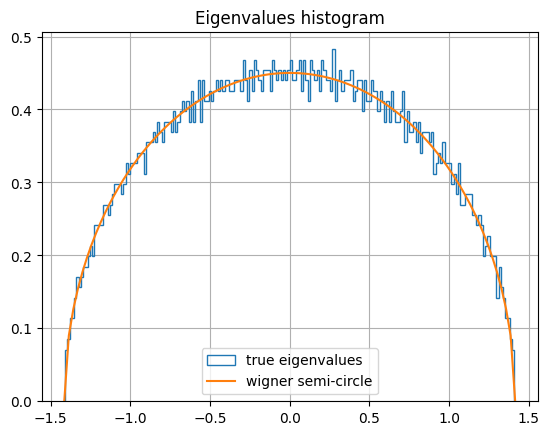

In [6]:
plt.hist(eigenvalues / (5000*2)**0.5, bins=200, label='true eigenvalues', histtype='step', density=True)

xs = np.linspace(-2**0.5+1e-8, 2**0.5-1e-8, 100, endpoint=True)
plt.plot(xs, wigner_semi_circle_function(xs), label='wigner semi-circle')

plt.legend()
plt.grid()
plt.title('Eigenvalues histogram')
plt.show()

In [84]:
def wigner_surmise(s):
    return np.pi * s / 2 * np.exp(-np.pi*s**2 / 4)

Spacing between eigenvalues should be divided by mean of spacings to have Wigner's surfice distribution

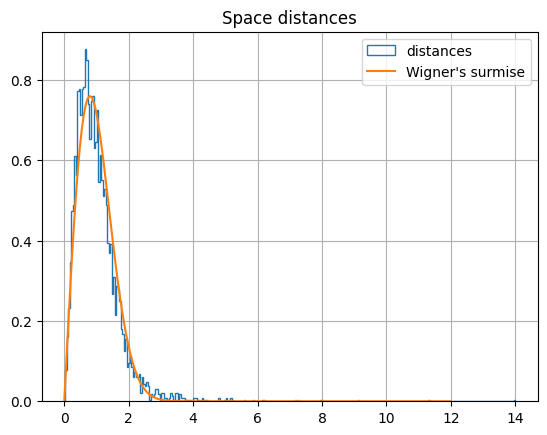

In [85]:
distances = eigenvalues[1:] - eigenvalues[:-1]
plt.hist(distances / np.mean(distances), label='distances', histtype='step', bins=300, density=True)

xs = np.linspace(0, 12, 200, endpoint=True)
plt.plot(xs, wigner_surmise(xs), label='Wigner\'s surmise')

plt.title('Space distances')
plt.grid()
plt.legend()
plt.show()

In [86]:
N = 1000
largest_eigenvalues = []
for _ in tqdm(range(1000)):
    random_elements = np.random.randn(N, N)
    goe_matrix = (random_elements + random_elements.T) / 2
    eigenvalue = eigh(goe_matrix, eigvals_only=True, subset_by_index=[999, 999])[0]
    largest_eigenvalues.append(eigenvalue)

largest_eigenvalues = np.array(largest_eigenvalues)

100%|██████████| 1000/1000 [06:18<00:00,  2.65it/s]


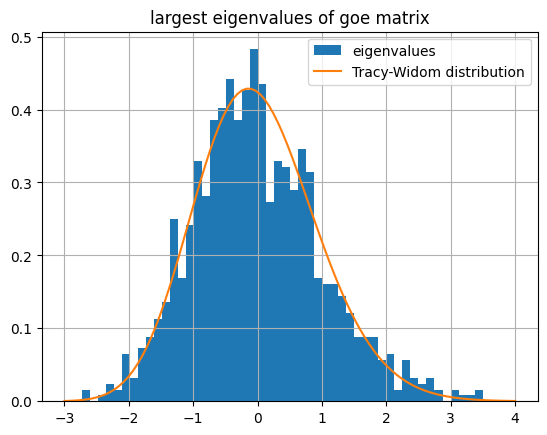

In [57]:
plt.hist((largest_eigenvalues - largest_eigenvalues.mean()) / largest_eigenvalues.std(), bins=50, label='eigenvalues', density=True)

xs = np.linspace(-3, 4, 100)
plt.plot(xs, gamma.pdf(xs, a=45, loc=-6.3, scale=0.14), label='Tracy-Widom distribution')

plt.title(f'largest eigenvalues of goe matrix')
plt.legend()
plt.grid()
plt.show()

# Problem 3

In [284]:
MEAN = 0.5
SCALE = 1 / 12**0.5

In [285]:
def sample_sum(N=1, M=1000):
    '''mu = 1/2 for standard uniform distribution'''
    random_uniform = np.random.uniform(0, 1, size=(M, N))
    sums = random_uniform.sum(axis=1)
    sums = (sums - N * MEAN) / N**0.5
    return sums

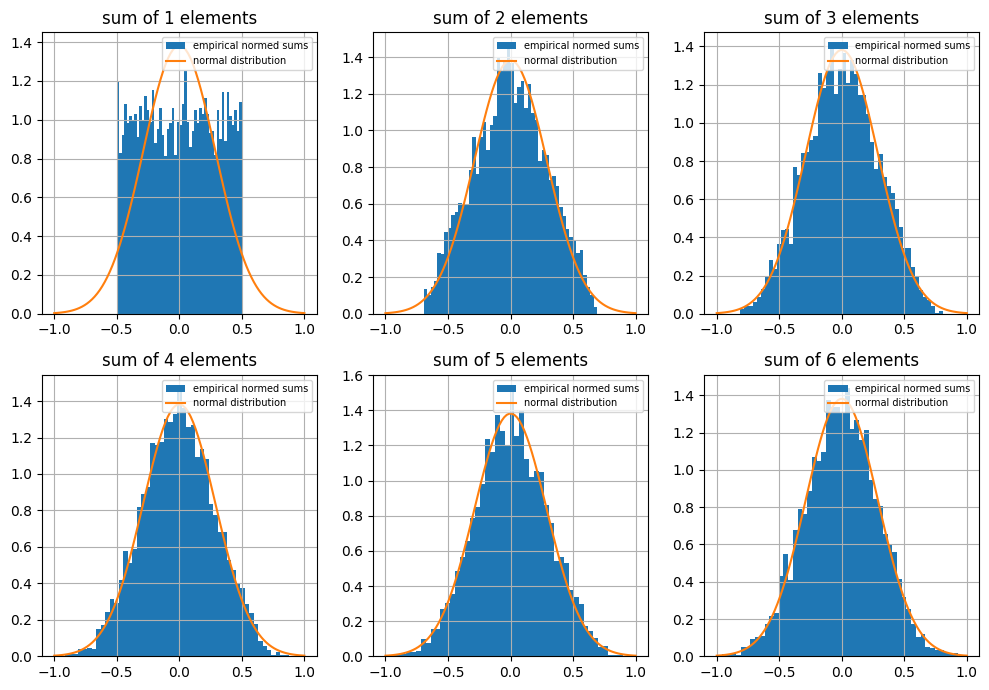

In [296]:
fig, axes = plt.subplots(2, 3, figsize=(10, 7))
xs = np.linspace(-1, 1, 100)

for N in range(6):
    sums = sample_sum(N + 1, M=5000)
    axes[N // 3][N % 3].hist(sums, density=True, bins=50, label='empirical normed sums')
    axes[N // 3][N % 3].plot(xs, norm.pdf(xs, scale=SCALE), label='normal distribution')
    axes[N // 3][N % 3].set_title(f'sum of {N+1} elements')
    axes[N // 3][N % 3].grid()
    axes[N // 3][N % 3].legend(fontsize=7)

plt.tight_layout()
plt.show()

As we can see, distribution converge to normal.

In [297]:
def get_KL(epmirical_sums):
    hists, bins = np.histogram(epmirical_sums, bins=50, density=True)
    bin_centers = (bins[1:] + bins[:-1]) / 2
    D_kl = 0
    for p, x in zip(hists, bin_centers):
        q = norm.pdf(x, scale=SCALE)
        if (p / q) != 0:
            D_kl += p * np.log(p / q)
    
    return D_kl

In [298]:
kls = []
for N in tqdm(range(20)):
    sums = sample_sum(N + 1, M=5000)
    d_kl = get_KL(sums)
    kls.append(d_kl)

100%|██████████| 20/20 [00:00<00:00, 121.58it/s]


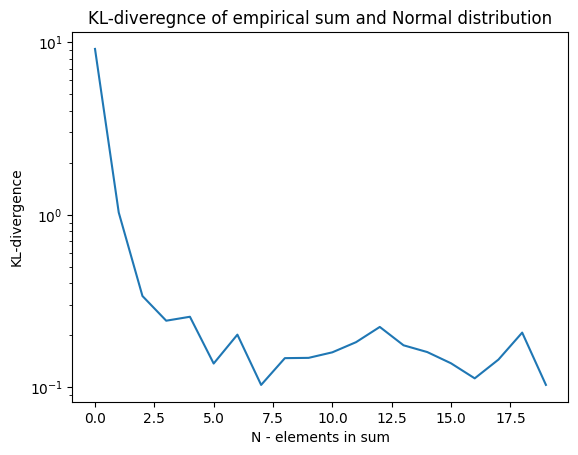

In [299]:
plt.plot(kls)
plt.title('KL-diveregnce of empirical sum and Normal distribution')
plt.xlabel('N - elements in sum')
plt.ylabel('KL-divergence')
plt.yscale('log')
plt.show()

# Problem 4

In [90]:
P = np.array([[1/2, 1/3, 1/6], [3/4, 0, 1/4], [0, 1, 0]])
P.sum(axis=1)

array([1., 1., 1.])

In [91]:
P.T

array([[0.5       , 0.75      , 0.        ],
       [0.33333333, 0.        , 1.        ],
       [0.16666667, 0.25      , 0.        ]])

Let's show that this is irreducible matrix. Matrix irreducible if $P(X_n = i| X_0 = j) > 0$ and $P(X_n = j| X_0 = i) > 0$ for every pair of states $(i, j)$.

We can see from our matrix, that this condition holds for pair of states (1, 2), due to non zero probabilites of getting from 1 to 2 and from 2 to 1. Also, this condition holds for pair (2, 3): from 3 state we definitly will go to state 2, and from state 2 we can go to state 3 with probability 0.25. And for pair (1, 3): from state 1 we can directly reach state 3, and from state 3 we can reach state 1 through state 2. So, we can conclude that matrix is irreducible.

Let's check periodicity. For state 1 we have periods: $1\to2, 2\to1$ and $1\to3, 3\to2, 2\to1$, for state 2: $2 \to 3, 3\to2$ or $2\to1, 1\to2$ and for state 3 perios is $3 \to 2, 2\to 3$. GSD of all these periods is 1, due to no higher gcd of 2 and 3 numbers. Thus, this matrix is aperiodic by definition.

### 2

In [92]:
eigenvalues, eigenvectors = np.linalg.eig(P.T)
eigenvalues = eigenvalues.round(2)

In [93]:
eigenvalues, eigenvectors

(array([ 0. ,  1. , -0.5]),
 array([[-0.80178373,  0.80178373,  0.58834841],
        [ 0.53452248,  0.53452248, -0.78446454],
        [ 0.26726124,  0.26726124,  0.19611614]]))

In [94]:
sorted_idx = abs(eigenvalues).argsort()
eigenvalues = eigenvalues[sorted_idx][::-1]
eigenvectors = eigenvectors[:, sorted_idx][:, ::-1]

In [95]:
eigenvalues.round(2)

array([ 1. , -0.5,  0. ])

In [96]:
eigenvectors, (eigenvectors**2).sum(0)

(array([[ 0.80178373,  0.58834841, -0.80178373],
        [ 0.53452248, -0.78446454,  0.53452248],
        [ 0.26726124,  0.19611614,  0.26726124]]),
 array([1., 1., 1.]))

### 3

In [97]:
init_state = np.array([1, 0, 0])

In [98]:
state_2_step = init_state @ P @ P #@ eigenvectors @ np.diag(eigenvalues**2) @ np.linalg.inv(eigenvectors)

In [99]:
print('Probability that after 2 steps process in state 3 is {:.3f}'.format(state_2_step[2]))

Probability that after 2 steps process in state 3 is 0.167


Let's express initial state as linear combination of eigenvectors

In [100]:
alphas = np.linalg.inv(eigenvectors) @ init_state

In [101]:
eigenvectors @ alphas

array([ 1.00000000e+00, -5.55111512e-17,  0.00000000e+00])

In [102]:
print('Coefficients of decomposition of initial state are a1 = {:.3}, a2 = {:.3}, a3 = {:.3}.'.format(*alphas))

Coefficients of decomposition of initial state are a1 = 0.624, a2 = 0.0, a3 = -0.624.


In [103]:
0.624 * eigenvectors[:, 0]

array([0.50031304, 0.33354203, 0.16677101])

Now we can derive formula for $\pi(t)$:
$$\pi(t) = 0.624\begin{pmatrix}0.80178373 \\ 0.53452248 \\ 0.26726124\end{pmatrix} + 0*(-0.5)^t*\begin{pmatrix}0.58834841 \\ -0.78446454 \\  0.19611614\end{pmatrix}-0.624*0^t*\begin{pmatrix}-0.80178373 \\ 0.53452248 \\ 0.26726124\end{pmatrix}$$

$$\pi(t) = \begin{pmatrix}0.50031304 \\ 0.33354203 \\ 0.16677101\end{pmatrix}$$

### 4

$$\lim\limits_{t \to \infty} P(t) = \lim\limits_{t \to \infty} P^t = \lim\limits_{t \to \infty} U \Sigma^t U^{-1} = U(\lim\limits_{t \to \infty}\Sigma^t)U^{-1}$$
$$\lim\limits_{t \to \infty}\Sigma^t = \begin{pmatrix}1, 0, 0 \\ 0, 0, 0 \\ 0, 0, 0\end{pmatrix}$$

In [59]:
Sigma_lim = np.zeros((3, 3))
Sigma_lim[0, 0] = 1
P_lim = eigenvectors @ Sigma_lim @ np.linalg.inv(eigenvectors)

### 5

In [61]:
pi_state = P_lim[:, 0]

In [62]:
for i, j in combinations(range(3), 2):
    print(f'for pair {i}, {j} we have {P[i][j] * pi_state[i] == P[j][i] * pi_state[j]}')

for pair 0, 1 we have False
for pair 0, 2 we have False
for pair 1, 2 we have False


We can see, that detailed balance condition does not hold.